Sankaran S - 25/07/2025

# **Coffee Shop Sales Using Linear Regression**

### importing libraries

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression
import joblib

In [2]:
# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

### Load the dataset

In [ ]:
df = pd.read_excel(r'.\coffee_shop_sales_dataset.xlsx', sheet_name='Daily_Sales_Data')
print(f"Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")

Dataset loaded successfully!
Dataset shape: (365, 26)
Date range: 2023-01-01 to 2023-12-31


### Exploratory Data Analysis

In [5]:
# Display basic info
print("Dataset Overview:")
df.head()

Dataset Overview:


,Date,Day_of_Week,Day_Name,Is_Weekend,Month,Season,Temperature_C,Is_Raining,Rainfall_mm,Is_Holiday,...,Pastry_Sales,Sandwich_Sales,Daily_Revenue,Staff_Cost,Ingredient_Cost,Utilities_Cost,Rent_Cost,Total_Costs,Daily_Profit,Customer_Satisfaction
0,2023-01-01,7,Sunday,1,1,Winter,9.0,1,2.7,1,...,45,17,411.11,160,135.3,42.10,200,537.40,-126.28,6.3
1,2023-01-02,1,Monday,0,1,Winter,0.4,0,0.0,0,...,16,7,205.12,320,58.7,57.80,200,636.50,-431.38,7.3
2,2023-01-03,2,Tuesday,0,1,Winter,6.0,0,0.0,0,...,25,12,459.23,400,112.4,42.33,200,754.73,-295.51,7.6
3,2023-01-04,3,Wednesday,0,1,Winter,3.2,1,1.1,0,...,12,9,198.49,240,80.1,44.42,200,564.52,-366.03,4.8
4,2023-01-05,4,Thursday,0,1,Winter,-6.8,1,1.3,0,...,17,11,201.65,240,63.1,49.47,200,552.57,-350.92,6.8


In [6]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   365 non-null    object 
 1   Day_of_Week            365 non-null    int64  
 2   Day_Name               365 non-null    object 
 3   Is_Weekend             365 non-null    int64  
 4   Month                  365 non-null    int64  
 5   Season                 365 non-null    object 
 6   Temperature_C          365 non-null    float64
 7   Is_Raining             365 non-null    int64  
 8   Rainfall_mm            365 non-null    float64
 9   Is_Holiday             365 non-null    int64  
 10  Promotion_Active       365 non-null    int64  
 11  Nearby_Events          365 non-null    int64  
 12  Staff_Count            365 non-null    int64  
 13  Machine_Issues         365 non-null    int64  
 14  Num_Customers          365 non-null    int64

In [9]:
#Check for missing values
print(f"Missing values: \n{df.isnull().sum()}")

Missing values: 
Date                     0
Day_of_Week              0
Day_Name                 0
Is_Weekend               0
Month                    0
Season                   0
Temperature_C            0
Is_Raining               0
Rainfall_mm              0
Is_Holiday               0
Promotion_Active         0
Nearby_Events            0
Staff_Count              0
Machine_Issues           0
Num_Customers            0
Coffee_Sales             0
Pastry_Sales             0
Sandwich_Sales           0
Daily_Revenue            0
Staff_Cost               0
Ingredient_Cost          0
Utilities_Cost           0
Rent_Cost                0
Total_Costs              0
Daily_Profit             0
Customer_Satisfaction    0
dtype: int64


In [11]:
# Convert date to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
df

,Date,Day_of_Week,Day_Name,Is_Weekend,Month,Season,Temperature_C,Is_Raining,Rainfall_mm,Is_Holiday,...,Pastry_Sales,Sandwich_Sales,Daily_Revenue,Staff_Cost,Ingredient_Cost,Utilities_Cost,Rent_Cost,Total_Costs,Daily_Profit,Customer_Satisfaction
0,2023-01-01,7,Sunday,1,1,Winter,9.0,1,2.7,1,...,45,17,411.11,160,135.3,42.10,200,537.40,-126.28,6.3
1,2023-01-02,1,Monday,0,1,Winter,0.4,0,0.0,0,...,16,7,205.12,320,58.7,57.80,200,636.50,-431.38,7.3
2,2023-01-03,2,Tuesday,0,1,Winter,6.0,0,0.0,0,...,25,12,459.23,400,112.4,42.33,200,754.73,-295.51,7.6
3,2023-01-04,3,Wednesday,0,1,Winter,3.2,1,1.1,0,...,12,9,198.49,240,80.1,44.42,200,564.52,-366.03,4.8
4,2023-01-05,4,Thursday,0,1,Winter,-6.8,1,1.3,0,...,17,11,201.65,240,63.1,49.47,200,552.57,-350.92,6.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2023-12-27,3,Wednesday,0,12,Winter,-4.9,0,0.0,0,...,11,7,247.86,320,61.9,49.34,200,631.24,-383.38,5.9
361,2023-12-28,4,Thursday,0,12,Winter,7.5,0,0.0,0,...,18,11,320.52,320,95.1,42.13,200,657.23,-336.71,7.3
362,2023-12-29,5,Friday,0,12,Winter,15.9,0,0.0,0,...,22,17,362.91,240,108.5,50.17,200,598.67,-235.76,8.3
363,2023-12-30,6,Saturday,1,12,Winter,12.8,0,0.0,0,...,42,19,488.92,240,143.1,52.62,200,635.72,-146.80,6.4


### Feature Engineering

In [15]:
# Create additional time-based features
df['Day_of_Year'] = df['Date'].dt.dayofyear
df['Week_of_Year'] = df['Date'].dt.isocalendar().week
df['Quarter'] = df['Date'].dt.quarter

In [16]:
df.head()

,Date,Day_of_Week,Day_Name,Is_Weekend,Month,Season,Temperature_C,Is_Raining,Rainfall_mm,Is_Holiday,...,Staff_Cost,Ingredient_Cost,Utilities_Cost,Rent_Cost,Total_Costs,Daily_Profit,Customer_Satisfaction,Day_of_Year,Week_of_Year,Quarter
0,2023-01-01,7,Sunday,1,1,Winter,9.0,1,2.7,1,...,160,135.3,42.10,200,537.40,-126.28,6.3,1,52,1
1,2023-01-02,1,Monday,0,1,Winter,0.4,0,0.0,0,...,320,58.7,57.80,200,636.50,-431.38,7.3,2,1,1
2,2023-01-03,2,Tuesday,0,1,Winter,6.0,0,0.0,0,...,400,112.4,42.33,200,754.73,-295.51,7.6,3,1,1
3,2023-01-04,3,Wednesday,0,1,Winter,3.2,1,1.1,0,...,240,80.1,44.42,200,564.52,-366.03,4.8,4,1,1
4,2023-01-05,4,Thursday,0,1,Winter,-6.8,1,1.3,0,...,240,63.1,49.47,200,552.57,-350.92,6.8,5,1,1


In [17]:
# Encode categorical variables
le_day = LabelEncoder()
df['Day_Name_Encoded'] = le_day.fit_transform(df['Day_Name'])

le_season = LabelEncoder()
df['Season_Encoded'] = le_season.fit_transform(df['Season'])

In [94]:
df['Season_Encoded'].unique()

array([3, 1, 2, 0])

In [103]:
df[df["Day_Name"]== "Sunday"].head()

,Date,Day_of_Week,Day_Name,Is_Weekend,Month,Season,Temperature_C,Is_Raining,Rainfall_mm,Is_Holiday,...,Utilities_Cost,Rent_Cost,Total_Costs,Daily_Profit,Customer_Satisfaction,Day_of_Year,Week_of_Year,Quarter,Day_Name_Encoded,Season_Encoded
0,2023-01-01,7,Sunday,1,1,Winter,9.0,1,2.7,1,...,42.10,200,537.40,-126.28,6.3,1,52,1,3,3
7,2023-01-08,7,Sunday,1,1,Winter,3.3,0,0.0,0,...,43.45,200,717.55,-199.50,7.3,8,1,1,3,3
14,2023-01-15,7,Sunday,1,1,Winter,12.0,1,4.8,0,...,43.88,200,560.88,-300.58,7.5,15,2,1,3,3
21,2023-01-22,7,Sunday,1,1,Winter,-10.0,0,0.0,0,...,40.09,200,613.49,-431.18,6.8,22,3,1,3,3
28,2023-01-29,7,Sunday,1,1,Winter,-0.5,0,0.0,0,...,45.35,200,681.35,-237.91,7.3,29,4,1,3,3


In [18]:
df.head()

,Date,Day_of_Week,Day_Name,Is_Weekend,Month,Season,Temperature_C,Is_Raining,Rainfall_mm,Is_Holiday,...,Utilities_Cost,Rent_Cost,Total_Costs,Daily_Profit,Customer_Satisfaction,Day_of_Year,Week_of_Year,Quarter,Day_Name_Encoded,Season_Encoded
0,2023-01-01,7,Sunday,1,1,Winter,9.0,1,2.7,1,...,42.10,200,537.40,-126.28,6.3,1,52,1,3,3
1,2023-01-02,1,Monday,0,1,Winter,0.4,0,0.0,0,...,57.80,200,636.50,-431.38,7.3,2,1,1,1,3
2,2023-01-03,2,Tuesday,0,1,Winter,6.0,0,0.0,0,...,42.33,200,754.73,-295.51,7.6,3,1,1,5,3
3,2023-01-04,3,Wednesday,0,1,Winter,3.2,1,1.1,0,...,44.42,200,564.52,-366.03,4.8,4,1,1,6,3
4,2023-01-05,4,Thursday,0,1,Winter,-6.8,1,1.3,0,...,49.47,200,552.57,-350.92,6.8,5,1,1,4,3


In [19]:
# Select features for modeling (exclude target and non-predictive columns)
exclude_cols = ['Date', 'Day_Name', 'Season', 'Daily_Revenue', 'Staff_Cost',
                'Ingredient_Cost', 'Utilities_Cost', 'Rent_Cost', 'Total_Costs',
                'Daily_Profit']

In [20]:
df.columns

Index(['Date', 'Day_of_Week', 'Day_Name', 'Is_Weekend', 'Month', 'Season',
       'Temperature_C', 'Is_Raining', 'Rainfall_mm', 'Is_Holiday',
       'Promotion_Active', 'Nearby_Events', 'Staff_Count', 'Machine_Issues',
       'Num_Customers', 'Coffee_Sales', 'Pastry_Sales', 'Sandwich_Sales',
       'Daily_Revenue', 'Staff_Cost', 'Ingredient_Cost', 'Utilities_Cost',
       'Rent_Cost', 'Total_Costs', 'Daily_Profit', 'Customer_Satisfaction',
       'Day_of_Year', 'Week_of_Year', 'Quarter', 'Day_Name_Encoded',
       'Season_Encoded'],
      dtype='object')

In [21]:
feature_cols = [col for col in df.columns if col not in exclude_cols]

# Assigning the values to X,y
X = df[feature_cols]
y = df['Daily_Revenue']

In [22]:
print(f"Features selected: {len(feature_cols)} columns")
print(f"Target variable: Daily_Revenue")

Features selected: 21 columns
Target variable: Daily_Revenue


In [23]:
feature_cols

['Day_of_Week',
 'Is_Weekend',
 'Month',
 'Temperature_C',
 'Is_Raining',
 'Rainfall_mm',
 'Is_Holiday',
 'Promotion_Active',
 'Nearby_Events',
 'Staff_Count',
 'Machine_Issues',
 'Num_Customers',
 'Coffee_Sales',
 'Pastry_Sales',
 'Sandwich_Sales',
 'Customer_Satisfaction',
 'Day_of_Year',
 'Week_of_Year',
 'Quarter',
 'Day_Name_Encoded',
 'Season_Encoded']

In [27]:
# Display feature list
print("Features used in model:\n")
for i, col in enumerate(feature_cols, 1):
    print(f"{i}. {col}")

Features used in model:

1. Day_of_Week
2. Is_Weekend
3. Month
4. Temperature_C
5. Is_Raining
6. Rainfall_mm
7. Is_Holiday
8. Promotion_Active
9. Nearby_Events
10. Staff_Count
11. Machine_Issues
12. Num_Customers
13. Coffee_Sales
14. Pastry_Sales
15. Sandwich_Sales
16. Customer_Satisfaction
17. Day_of_Year
18. Week_of_Year
19. Quarter
20. Day_Name_Encoded
21. Season_Encoded


In [28]:
# Basic statistics
print("Target Variable (Daily_Revenue) Statistics:")
print(f"Mean: ${y.mean():.2f}")
print(f"Median: ${y.median():.2f}")
print(f"Std Dev: ${y.std():.2f}")
print(f"Min: ${y.min():.2f}")
print(f"Max: ${y.max():.2f}")

Target Variable (Daily_Revenue) Statistics:
Mean: $318.04
Median: $313.43
Std Dev: $104.61
Min: $50.00
Max: $698.79


In [38]:
# Correlation analysis
print("Top 10 Features Correlated with Daily Revenue:")
corr_full = df[feature_cols + ['Daily_Revenue']].corr()
correlations = corr_full['Daily_Revenue'].sort_values(ascending=False).head(11)[1:] # Exclude self-correlation
print(correlations)  

Top 10 Features Correlated with Daily Revenue:
Coffee_Sales             0.850058
Num_Customers            0.826685
Pastry_Sales             0.709539
Sandwich_Sales           0.599494
Nearby_Events            0.314505
Customer_Satisfaction    0.310457
Is_Weekend               0.309296
Day_of_Week              0.272246
Temperature_C            0.269180
Staff_Count              0.266494
Name: Daily_Revenue, dtype: float64


In [48]:
correlations.head(5).index

Index(['Coffee_Sales', 'Num_Customers', 'Pastry_Sales', 'Sandwich_Sales',
       'Nearby_Events'],
      dtype='object')

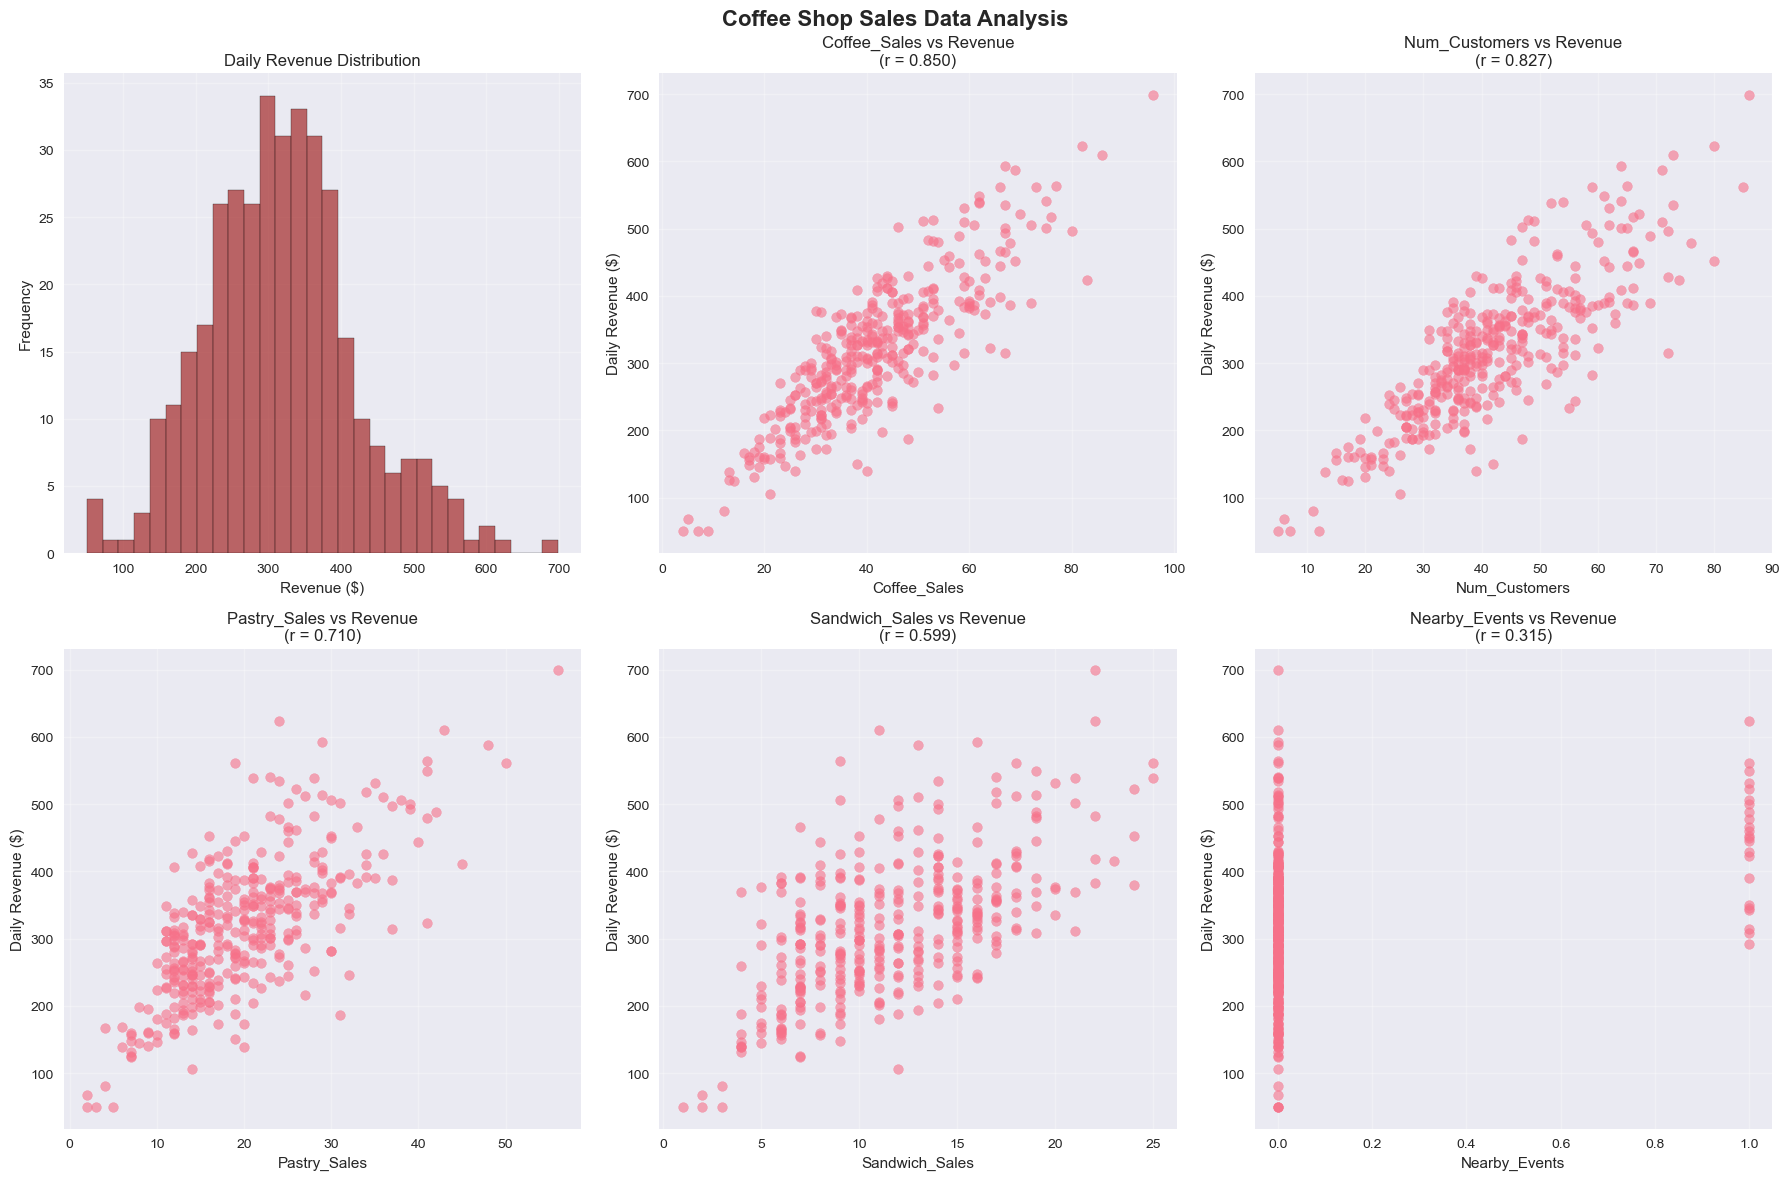

In [ ]:
plt.figure(figsize=(18, 12))

plt.suptitle('Coffee Shop Sales Data Analysis', fontsize=16, fontweight='bold')

# Plot 1: Histogram of Daily Revenue
plt.subplot(2, 3, 1)  # (rows=2, cols=3, position=1)
plt.hist(y, bins=30, color='brown', edgecolor='black', alpha=0.7)
plt.title('Daily Revenue Distribution')
plt.xlabel('Revenue ($)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# Top 5 correlated features
top_features = correlations.head(5).index

# Plot 2–6: Scatter plots of features vs Daily Revenue
for i, feature in enumerate(top_features, start=2):  # start=2 to go to subplot 2, 3, 4...
    plt.subplot(2, 3, i)
    plt.scatter(df[feature], y, alpha=0.6)
    plt.title(f'{feature} vs Revenue\n(r = {correlations[feature]:.3f})')
    plt.xlabel(feature)
    plt.ylabel('Daily Revenue ($)')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Top 10 Features for Heatmap: ['Coffee_Sales', 'Num_Customers', 'Pastry_Sales', 'Sandwich_Sales', 'Nearby_Events', 'Customer_Satisfaction', 'Is_Weekend', 'Day_of_Week', 'Temperature_C', 'Staff_Count']


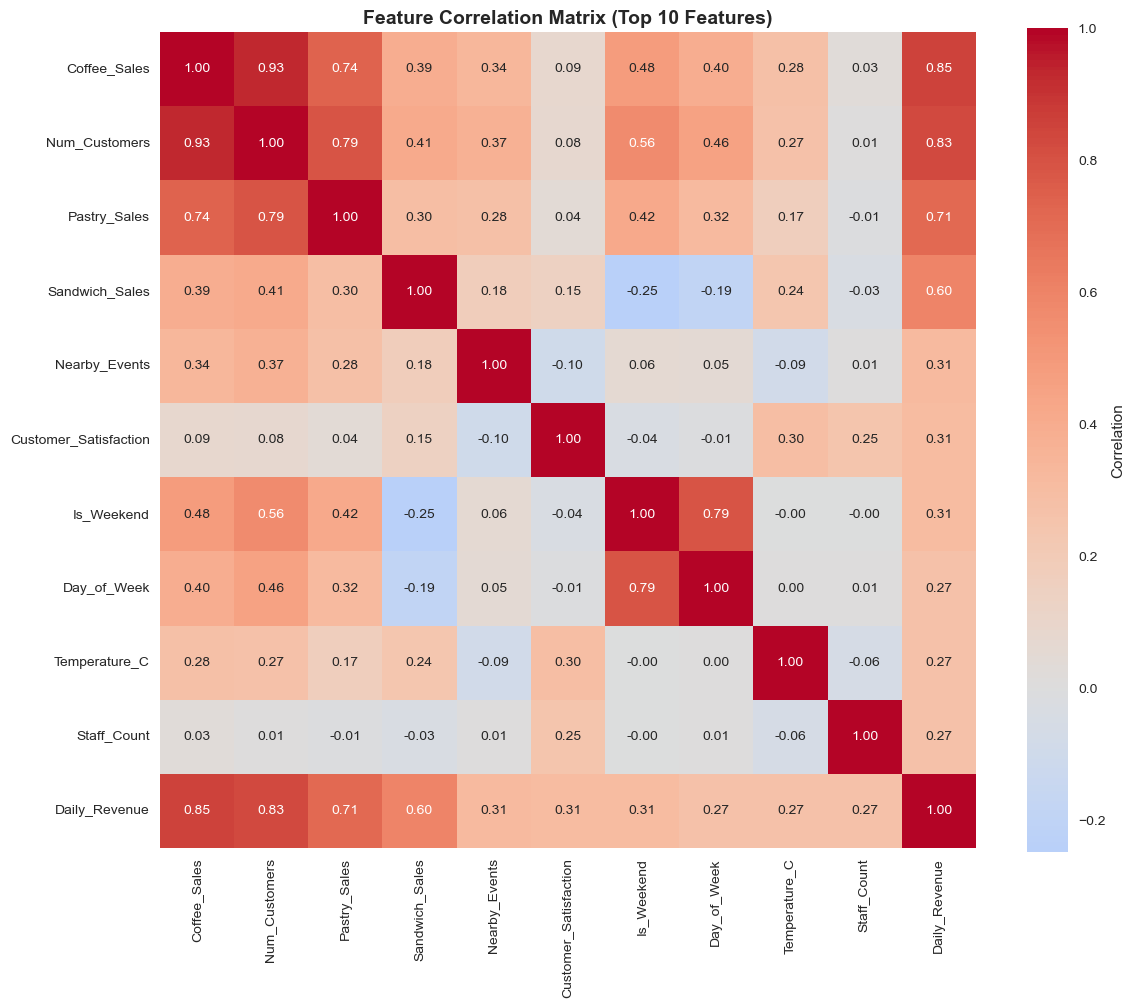

In [ ]:
# Feature correlation heatmap
plt.figure(figsize=(12, 10))

# Select Top 10 features
important_features = correlations.index[:10]
print(f"Top 10 Features for Heatmap: {[i for i in important_features]}")

corr_matrix = df[list(important_features) + ['Daily_Revenue']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={'label': 'Correlation'})
plt.title('Feature Correlation Matrix (Top 10 Features)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### Model Training

In [50]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=None)

print(f"Data Split:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Data Split:
Training set: 292 samples
Test set: 73 samples


🧮 What is Feature Scaling?

Feature scaling means bringing all input features to the same scale, usually with mean = 0 and standard deviation = 1.

For example:

- Some features may be in lakhs (₹) like revenue

- Some may be in 0–10 scale like satisfaction score

- Some may be binary (0/1)

If we don’t scale, features with larger ranges can dominate the model's learning process.

📏 Why StandardScaler?

scaler = StandardScaler()

StandardScaler subtracts the mean and divides by the standard deviation for each feature.

After scaling:

Mean = 0

Standard Deviation = 1

This is especially important for regression models, gradient descent algorithms, and distance-based models.

🏋️ Fit and Transform the Training Data

X_train_scaled = scaler.fit_transform(X_train)

.fit() learns the mean and standard deviation from X_train.

.transform() uses those values to scale X_train data.

⚠️ Important:

We always fit only on the training set to prevent data leakage from the test set.

🛠️ Transform the Test Data Using the Same Scaler

X_test_scaled = scaler.transform(X_test)

Now, we only transform X_test using the mean and std learned from training data.

Why?

We want the model to see test data under the same conditions as training data — this ensures fair evaluation.

✅ Why are we using it here?

- Linear Regression works better and converges faster when features are scaled.

- Helps avoid issues caused by large variations in data range.

- Makes coefficients easier to interpret.

- Prepares the data before applying feature selection and model training.

In [104]:
X_train.columns

Index(['Day_of_Week', 'Is_Weekend', 'Month', 'Temperature_C', 'Is_Raining',
       'Rainfall_mm', 'Is_Holiday', 'Promotion_Active', 'Nearby_Events',
       'Staff_Count', 'Machine_Issues', 'Num_Customers', 'Coffee_Sales',
       'Pastry_Sales', 'Sandwich_Sales', 'Customer_Satisfaction',
       'Day_of_Year', 'Week_of_Year', 'Quarter', 'Day_Name_Encoded',
       'Season_Encoded'],
      dtype='object')

In [51]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
X_train_scaled

array([[-1.51551436, -0.64080264,  0.12558378, ...,  0.43428383,
        -0.94381775,  0.51017365],
       [-0.02216163, -0.64080264,  1.61625303, ...,  1.3465923 ,
         0.56767101,  1.41853161],
       [ 0.97340686,  1.56054289,  0.12558378, ...,  0.43428383,
        -0.43998817,  0.51017365],
       ...,
       [-0.02216163, -0.64080264,  0.72185148, ...,  0.43428383,
         0.56767101, -1.30654228],
       [ 0.47562262, -0.64080264,  1.61625303, ...,  1.3465923 ,
        -1.44764734,  1.41853161],
       [-0.02216163, -0.64080264, -0.76881777, ..., -0.47802464,
         0.56767101, -0.39818431]], shape=(292, 21))

**Feature Selection using SelectKBest**

- Used `SelectKBest(f_regression, k=15)` to select top 15 relevant features.
- `f_regression` checks how strongly each feature is related to the target.
- `fit_transform()` on `X_train_scaled` selects features based on training data.
- `transform()` on `X_test_scaled` applies the same selection (avoids data leakage).
- `get_support()` gives names of selected features.

Helps:
- Reduce noise and overfitting
- Improve model speed and accuracy


In [53]:
# Feature selection (optional - select top K features)
selector = SelectKBest(score_func=f_regression, k=15)  # Select top 15 features
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

selected_features = X.columns[selector.get_support()]
print(f"Feature Selection: Top {len(selected_features)} features selected")
print("Selected features:", list(selected_features))

Feature Selection: Top 15 features selected
Selected features: ['Day_of_Week', 'Is_Weekend', 'Temperature_C', 'Is_Raining', 'Rainfall_mm', 'Is_Holiday', 'Promotion_Active', 'Nearby_Events', 'Staff_Count', 'Machine_Issues', 'Num_Customers', 'Coffee_Sales', 'Pastry_Sales', 'Sandwich_Sales', 'Customer_Satisfaction']


In [ ]:
# Create and train the linear regression model
print("Training Linear Regression Model...")
model = LinearRegression()
model.fit(X_train_selected, y_train)
print("Model trained successfully")

Training Linear Regression Model...:
Model trained successfully


### Prediction

In [55]:
# Make predictions
y_pred_train = model.predict(X_train_selected)
y_pred_test = model.predict(X_test_selected)

In [57]:
y_pred_test[:5]

array([379.13789798, 327.61419026, 176.14739673, 257.18180916,
       323.97115143])

In [58]:
# Calculate metrics
def calculate_metrics(y_true, y_pred, dataset_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    # Additional metrics
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print(f"\n📊 {dataset_name} Set Performance:")
    print(f"R² Score: {r2:.4f}")
    print(f"RMSE: ${rmse:.2f}")
    print(f"MAE: ${mae:.2f}")
    print(f"MAPE: {mape:.2f}%")

    return {'R2': r2, 'RMSE': rmse, 'MAE': mae, 'MAPE': mape}

What it does:

MAPE measures the average percentage error between the actual values (y_true) and the predicted values (y_pred).

How it's calculated:

- (y_true - y_pred) → Difference (error) between actual and predicted values.

- np.abs(...) → Take absolute value so negative errors don’t cancel out positive ones.

- ... / y_true → Divide by actual values to convert to a percentage error.

- np.mean(...) → Average across all samples.

- * 100 → Convert it into a percentage.

Why use it:

MAPE is useful when you want to express prediction error as a percentage — easy for business interpretation.

In [59]:
# Evaluate model performance
train_metrics = calculate_metrics(y_train, y_pred_train, "Training")
test_metrics = calculate_metrics(y_test, y_pred_test, "Test")


📊 Training Set Performance:
R² Score: 0.9573
RMSE: $21.05
MAE: $16.15
MAPE: 5.63%

📊 Test Set Performance:
R² Score: 0.9465
RMSE: $25.20
MAE: $19.75
MAPE: 9.59%


**Model Performance Summary**

| Metric     | Training Set | Test Set   |
|------------|--------------|------------|
| **R²**     | 0.9573       | 0.9465     |
| **RMSE**   | $21.05       | $25.20     |
| **MAE**    | $16.15       | $19.75     |
| **MAPE**   | 5.63%        | 9.59%      |

**Insights**:
- R² is close to 1 → Excellent model fit.
- Low RMSE/MAE → Predictions are close to actual values.
- MAPE < 10% → Very good performance.


In [60]:
# Check for overfitting
print(f"Overfitting Check:")
print(f"R² difference (Train - Test): {train_metrics['R2'] - test_metrics['R2']:.4f}")

if abs(train_metrics['R2'] - test_metrics['R2']) < 0.05:
    print("Model appears to generalize well (low overfitting)")
else:
    print("Potential overfitting detected")

Overfitting Check:
R² difference (Train - Test): 0.0108
Model appears to generalize well (low overfitting)


In [61]:
model.coef_

array([  0.9681867 ,   2.6222028 ,  -1.39201264,  -0.54108021,
         2.36492714,  -0.82765546, -12.81437909,  -3.40963123,
        27.58507045, -21.68591876,   1.95258446,  58.31991957,
        23.94765895,  36.83544697,   0.47822897])

In [62]:
# Feature importance analysis
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': model.coef_,
    'Abs_Coefficient': np.abs(model.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print(f"Feature Importance (Top 10):")
display(feature_importance.head(10))

Feature Importance (Top 10):


,Feature,Coefficient,Abs_Coefficient
11,Coffee_Sales,58.319920,58.319920
13,Sandwich_Sales,36.835447,36.835447
8,Staff_Count,27.585070,27.585070
12,Pastry_Sales,23.947659,23.947659
9,Machine_Issues,-21.685919,21.685919
6,Promotion_Active,-12.814379,12.814379
7,Nearby_Events,-3.409631,3.409631
1,Is_Weekend,2.622203,2.622203
4,Rainfall_mm,2.364927,2.364927
10,Num_Customers,1.952584,1.952584


We want to understand how the model makes predictions by:

* Seeing the model’s intercept (baseline value)

* Identifying which features influence the revenue the most

* Knowing whether each feature increases or decreases revenue

In [64]:
# Model interpretation: Intercept is the predicted y value when all feature values (X) are 0
print(f"Model Interpretation: y value when all x values (features) are 0")
print(f"Intercept: ${model.intercept_:.2f}")

Model Interpretation: y value when all x values (features) are 0
Intercept: $325.78


### Visualization

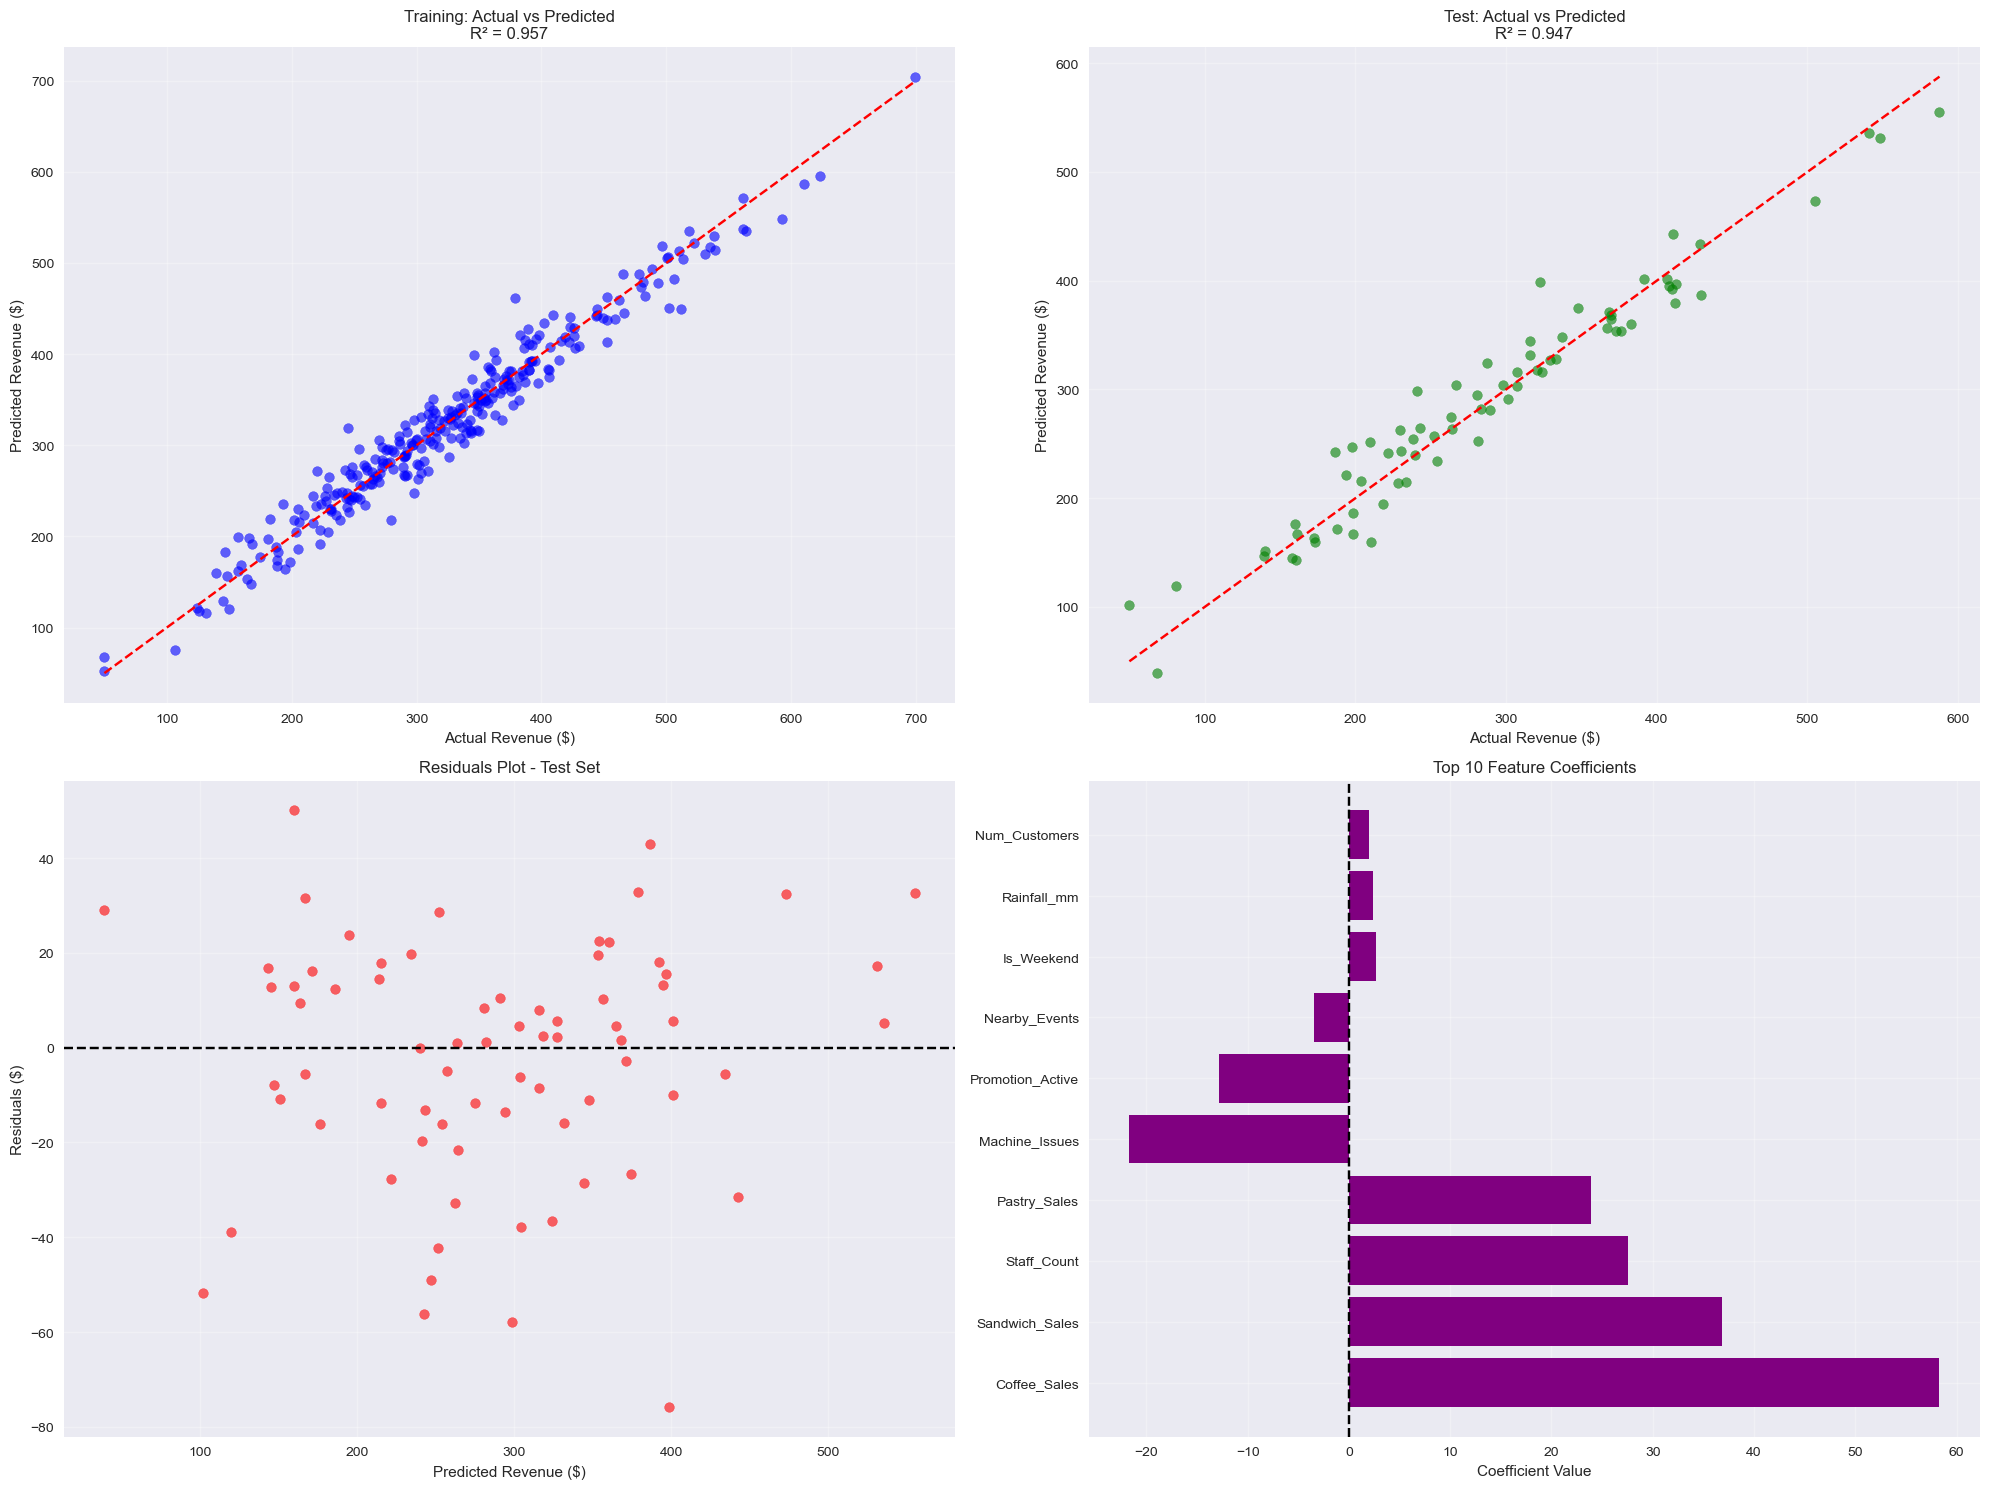

In [72]:
plt.figure(figsize=(20, 15))

# Subplot 1: Training - Actual vs Predicted
plt.subplot(2, 2, 1)
plt.scatter(y_train, y_pred_train, alpha=0.6, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')  # Reference line
plt.xlabel('Actual Revenue ($)')
plt.ylabel('Predicted Revenue ($)')
plt.title(f'Training: Actual vs Predicted\nR² = {train_metrics["R2"]:.3f}')
plt.grid(True, alpha=0.3)

# Subplot 2: Test - Actual vs Predicted
plt.subplot(2, 2, 2)
plt.scatter(y_test, y_pred_test, alpha=0.6, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal prediction line
plt.xlabel('Actual Revenue ($)')
plt.ylabel('Predicted Revenue ($)')
plt.title(f'Test: Actual vs Predicted\nR² = {test_metrics["R2"]:.3f}')
plt.grid(True, alpha=0.3)

# Subplot 3: Residuals Plot
plt.subplot(2, 2, 3)
residuals = y_test - y_pred_test
plt.scatter(y_pred_test, residuals, alpha=0.6, color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Revenue ($)')
plt.ylabel('Residuals ($)')
plt.title('Residuals Plot - Test Set')
plt.grid(True, alpha=0.3)

# Subplot 4: Top 10 Feature Coefficients
plt.subplot(2, 2, 4)
top_features = feature_importance.head(10)
plt.barh(top_features['Feature'], top_features['Coefficient'], color='purple')
plt.axvline(x=0, color='black', linestyle='--')
plt.xlabel('Coefficient Value')
plt.title('Top 10 Feature Coefficients')
plt.grid(True, alpha=0.3)

# Layout adjustment
plt.tight_layout()
plt.show()


| Subplot                           | Purpose                                  | What it shows                                            |
| --------------------------------- | ---------------------------------------- | -------------------------------------------------------- |
| 1️⃣ Training: Actual vs Predicted | Checks how well model fits training data | Points should be close to the red dashed line            |
| 2️⃣ Test: Actual vs Predicted     | Evaluates generalization on unseen data  | Good model → points lie close to line                    |
| 3️⃣ Residuals Plot(Wrong guesses)              | Error analysis                           | Random spread around 0 means good fit                    |
| 4️⃣ Feature Coefficients          | Feature impact                           | Higher absolute value → stronger influence on prediction |


### Overall Insights Summary

- High model accuracy on both training and test data (R² > 0.94)

- Coffee and Sandwich Sales are top drivers of revenue.

- Machine Issues and ineffective promotions negatively impact revenue.

- Residuals are random, indicating no major model bias.

- Model is interpretable and provides actionable business recommendations.

In [83]:
# Create sample scenarios
scenarios = [
    {
        'name': 'Perfect Weekend Day',
        'data': {
            'Day_of_Week': 7, 'Is_Weekend': 1, 'Month': 6, 'Temperature_C': 25,
            'Is_Raining': 0, 'Rainfall_mm': 0, 'Is_Holiday': 0, 'Promotion_Active': 1,
            'Nearby_Events': 1, 'Staff_Count': 5, 'Machine_Issues': 0, 'Num_Customers': 70,
            'Coffee_Sales': 85, 'Pastry_Sales': 45, 'Sandwich_Sales': 25,
            'Customer_Satisfaction': 9.0, 'Day_of_Year': 150, 'Week_of_Year': 25,
            'Quarter': 2, 'Day_Name_Encoded': 6, 'Season_Encoded': 3
        }
    },
    {
        'name': 'Rainy Weekday',
        'data': {
            'Day_of_Week': 2, 'Is_Weekend': 0, 'Month': 11, 'Temperature_C': 8,
            'Is_Raining': 1, 'Rainfall_mm': 5.5, 'Is_Holiday': 0, 'Promotion_Active': 0,
            'Nearby_Events': 0, 'Staff_Count': 3, 'Machine_Issues': 0, 'Num_Customers': 25,
            'Coffee_Sales': 30, 'Pastry_Sales': 15, 'Sandwich_Sales': 8,
            'Customer_Satisfaction': 6.5, 'Day_of_Year': 300, 'Week_of_Year': 45,
            'Quarter': 4, 'Day_Name_Encoded': 1, 'Season_Encoded': 0
        }
    },
    {
        'name': 'Average Day',
        'data': {
            'Day_of_Week': 4, 'Is_Weekend': 0, 'Month': 4, 'Temperature_C': 18,
            'Is_Raining': 0, 'Rainfall_mm': 0, 'Is_Holiday': 0, 'Promotion_Active': 0,
            'Nearby_Events': 0, 'Staff_Count': 3, 'Machine_Issues': 0, 'Num_Customers': 45,
            'Coffee_Sales': 50, 'Pastry_Sales': 22, 'Sandwich_Sales': 15,
            'Customer_Satisfaction': 7.5, 'Day_of_Year': 100, 'Week_of_Year': 15,
            'Quarter': 2, 'Day_Name_Encoded': 3, 'Season_Encoded': 2
        }
    }
]

In [86]:
scenarios

[{'name': 'Perfect Weekend Day',
  'data': {'Day_of_Week': 7,
   'Is_Weekend': 1,
   'Month': 6,
   'Temperature_C': 25,
   'Is_Raining': 0,
   'Rainfall_mm': 0,
   'Is_Holiday': 0,
   'Promotion_Active': 1,
   'Nearby_Events': 1,
   'Staff_Count': 5,
   'Machine_Issues': 0,
   'Num_Customers': 70,
   'Coffee_Sales': 85,
   'Pastry_Sales': 45,
   'Sandwich_Sales': 25,
   'Customer_Satisfaction': 9.0,
   'Day_of_Year': 150,
   'Week_of_Year': 25,
   'Quarter': 2,
   'Day_Name_Encoded': 6,
   'Season_Encoded': 3}},
 {'name': 'Rainy Weekday',
  'data': {'Day_of_Week': 2,
   'Is_Weekend': 0,
   'Month': 11,
   'Temperature_C': 8,
   'Is_Raining': 1,
   'Rainfall_mm': 5.5,
   'Is_Holiday': 0,
   'Promotion_Active': 0,
   'Nearby_Events': 0,
   'Staff_Count': 3,
   'Machine_Issues': 0,
   'Num_Customers': 25,
   'Coffee_Sales': 30,
   'Pastry_Sales': 15,
   'Sandwich_Sales': 8,
   'Customer_Satisfaction': 6.5,
   'Day_of_Year': 300,
   'Week_of_Year': 45,
   'Quarter': 4,
   'Day_Name_Encode

In [87]:
# Example predictions
print(f"Example Predictions:")
print("-" * 40)

for scenario in scenarios:
    sample_df = pd.DataFrame([scenario['data']])
    sample_scaled = scaler.transform(sample_df)
    sample_selected = selector.transform(sample_scaled)
    prediction = model.predict(sample_selected)[0]

    print(f"\n{scenario['name']}:")
    print(f"  Predicted Revenue: ${prediction:.2f}")
    key_features = ['Coffee_Sales', 'Num_Customers', 'Temperature_C', 'Is_Weekend', 'Promotion_Active', 'Staff_Count']
    for feature in key_features:
        if feature in scenario['data']:
            print(f"  {feature}: {scenario['data'][feature]}")

Example Predictions:
----------------------------------------

Perfect Weekend Day:
  Predicted Revenue: $684.30
  Coffee_Sales: 85
  Num_Customers: 70
  Temperature_C: 25
  Is_Weekend: 1
  Promotion_Active: 1
  Staff_Count: 5

Rainy Weekday:
  Predicted Revenue: $221.12
  Coffee_Sales: 30
  Num_Customers: 25
  Temperature_C: 8
  Is_Weekend: 0
  Promotion_Active: 0
  Staff_Count: 3

Average Day:
  Predicted Revenue: $374.22
  Coffee_Sales: 50
  Num_Customers: 45
  Temperature_C: 18
  Is_Weekend: 0
  Promotion_Active: 0
  Staff_Count: 3


In [91]:
# Summary
print(f"Model Summary:")
print("-" * 30)
print(f"Model successfully trained on {len(X_train)} samples")
print(f"Test R² Score: {test_metrics['R2']:.4f}")
print(f"Test RMSE: ${test_metrics['RMSE']:.2f}")
print(f"Model can predict coffee shop revenue with {test_metrics['R2']*100:.1f}% accuracy")
print(f"Most important factor: {feature_importance.iloc[0]['Feature']}")

Model Summary:
------------------------------
Model successfully trained on 292 samples
Test R² Score: 0.9465
Test RMSE: $25.20
Model can predict coffee shop revenue with 94.7% accuracy
Most important factor: Coffee_Sales


### Save the model

In [93]:
#Save the model 
joblib.dump(model, "coffee_Sales_model.pkl")

#Save the scaler
joblib.dump(scaler, "scaler.pkl")

#Save the selector_model
joblib.dump(selector, "feature_selector.pkl")

['feature_selector.pkl']